## EDA on WB pop data: basic manipulations and outliers

Use this notebook to answer the questions on the board. For each cell:
- Can you explain what the code is doing?
- Is there anything you can change/ adjust?
- Try writing the same or your own version in a new cell below.

### Import libraries and data

In [84]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
# import data - get current working directory and its parent
cwd = os.getcwd()
parent_path = os.path.dirname(cwd)

df_og = pd.read_csv(parent_path + '/data/WB_pop_clean.csv')

### Distribution and outliers

- Are there any outliers?
    - Show them in a box plot.
    - What could you do with them?
- Can you plot a histogram and/ or kernel density for the values in 2023?

In [86]:
# it's good practice to make a copy of the data set before you start manipulating it
# that way you also don't have to import the data from scratch each time you made an error (e.g. removing a column you end up wanting to keep)

df = df_og.copy()

In [88]:
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '1990',
       '2000', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

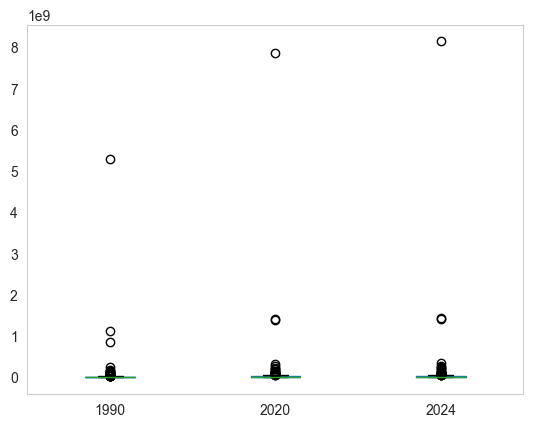

In [89]:
years_choice = ['1990', '2020', '2024']
df.boxplot(column = years_choice, grid = False) # this is native to pandas which uses matplotlib without us having to call it
plt.show()

In [102]:
# we know the "world" row is the outlier, which is not a country, so let's remove it
# remember: we can just re-run the cell that copies the og data to undo this change)

# option 1: only keep other rows
df = df[df['Country Name'] != 'World']

# option 2: drop specific row
#df = df.drop(df.loc[df['Country Name'] == 'World'])

# option 3: see the option with ~ and .isin([you_list])
# to_drop = ['World']
# df = df[~df['Country Name'].isin(to_drop)]

# check that there is one row less:
print(df.shape)


(217, 18)


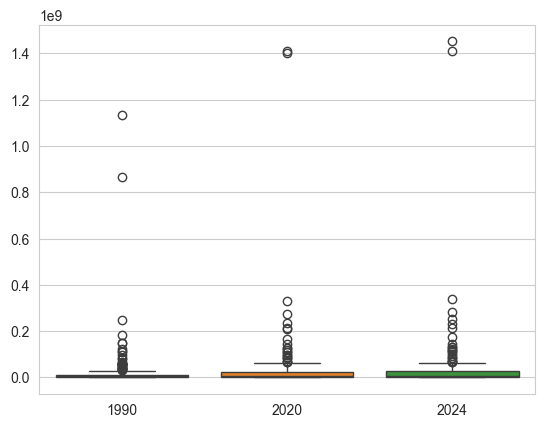

In [91]:
# plot again, this time with seaborn, and you can watch India overtake China

sns.set_style("whitegrid") 

columns_to_plot = years_choice
  
sns.boxplot(data = df[columns_to_plot]) 
plt.show()

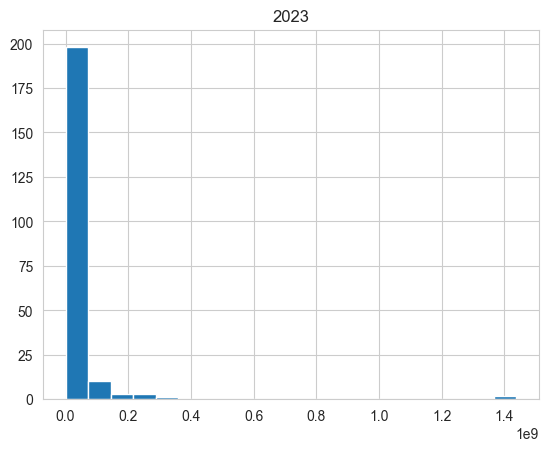

In [92]:
# play with the bins variable of the histogram
df.hist(column=['2023'], bins=20)
plt.show()

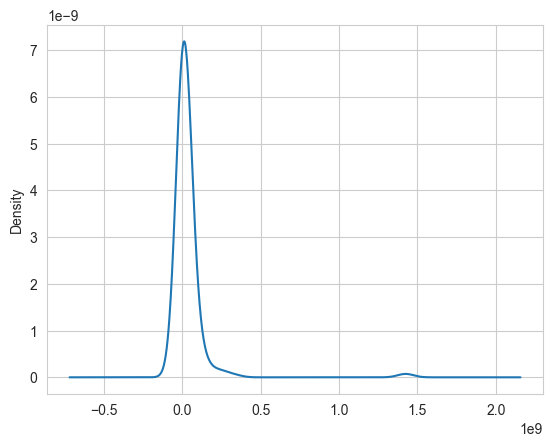

In [93]:
# kernel densities also give an idea of the overall distribution

df['2023'].plot.density()
plt.show()

### Population growth over time


- Which county has seen the greatest population growth from the start to the end of the timeline?
    - In absolute terms?
    - In relative terms?
    - What about the greatest decrease?

In [94]:
# create a new column that shows the difference between two years of your choice- note that the absolute value would not be helpful

year1 = '1990'
year2 = '2024'

df[f'gwth_{year1}_{year2}_abs'] = df[year2] - df[year1] 
df[f'gwth_{year1}_{year2}_rel'] = round(df[f'gwth_{year1}_{year2}_abs'] / df[year1], 2)
df.head(2)

,Series Name,Series Code,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gwth_1990_2024_abs,gwth_1990_2024_rel
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,12045660,20130327,33831764,34700612,35688935,36743039,37856121,39068979,40000412,40578842,41454761,42647492,30601832,2.54
1,"Population, total",SP.POP.TOTL,Albania,ALB,3286542,3089027,2880703,2876101,2873457,2866376,2854191,2837849,2811666,2777689,2745972,2714617,-571925,-0.17


In [95]:
# find the highest growth values - you can of course to the equivalent for the smallest (i.e. most negative) values
# bonus: can you find the countries with the samlles positive growth?

print(f'Greatest absolute growth from {year1} to {year2}: ')
print('   - Country: ', df.nlargest(1,f'gwth_{year1}_{year2}_abs')['Country Name'])
print('   - Growth: ', df.nlargest(1, f'gwth_{year1}_{year2}_abs')[f'gwth_{year1}_{year2}_abs'])

print('\n') # this prints a line break

print(f'Greatest relative growth from {year1} to {year2}: ')
print('   - Country: ', df.nlargest(1, f'gwth_{year1}_{year2}_rel')['Country Name'])
print('   - Growth: ', df.nlargest(1, f'gwth_{year1}_{year2}_rel')[f'gwth_{year1}_{year2}_rel'])

Greatest absolute growth from 1990 to 2024: 
   - Country:  89    India
Name: Country Name, dtype: object
   - Growth:  89    585963570
Name: gwth_1990_2024_abs, dtype: int64


Greatest relative growth from 1990 to 2024: 
   - Country:  159    Qatar
Name: Country Name, dtype: object
   - Growth:  159    5.49
Name: gwth_1990_2024_rel, dtype: float64


##### Comparing rows (countries)


Addresses the following questions from class:
- Show just the rows for Spain and your country/ countries of origin
- Can you create a new row that shows the difference in population over time?
- Can you plot this?

In [96]:
# displaying only selected countries

df.loc[( df['Country Name']== 'Germany') | (df['Country Name']== 'United Kingdom') | (df['Country Name']== 'Spain')]

,Series Name,Series Code,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gwth_1990_2024_abs,gwth_1990_2024_rel
73,"Population, total",SP.POP.TOTL,Germany,DEU,79433029,82211508,81686611,82348669,82657002,82905782,83092962,83160871,83196078,83797985,83901923,83510950,4077921,0.05
179,"Population, total",SP.POP.TOTL,Spain,ESP,38867322,40567864,46422303,46458139,46571232,46782011,47118501,47359424,47443821,47786102,48347910,48807137,9939815,0.26
205,"Population, total",SP.POP.TOTL,United Kingdom,GBR,57247586,58892514,65088000,65607000,65966000,66289000,66631000,66744000,66984000,67604000,68492000,69226000,11978414,0.21


In [97]:
# slightly neater and more flexible

country_choices = ['Germany', 'United Kingdom', 'Spain']

df.loc[df['Country Name'].isin(country_choices)].sort_values('2023', ascending=False) # here I am also specifying what to sort by

,Series Name,Series Code,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gwth_1990_2024_abs,gwth_1990_2024_rel
73,"Population, total",SP.POP.TOTL,Germany,DEU,79433029,82211508,81686611,82348669,82657002,82905782,83092962,83160871,83196078,83797985,83901923,83510950,4077921,0.05
205,"Population, total",SP.POP.TOTL,United Kingdom,GBR,57247586,58892514,65088000,65607000,65966000,66289000,66631000,66744000,66984000,67604000,68492000,69226000,11978414,0.21
179,"Population, total",SP.POP.TOTL,Spain,ESP,38867322,40567864,46422303,46458139,46571232,46782011,47118501,47359424,47443821,47786102,48347910,48807137,9939815,0.26


##### Using transpose to compare columns

In [98]:
# given the original format of the data, the easiest way to comoare values witin a column is transpose the data
# to work only with the subset we can store it in a new data frame

# country_choices = ['Germany', 'United Kingdom', 'Spain'] # this was already set above

df_subset = df.loc[df['Country Name'].isin(country_choices) ]

# without this the transpose creates repeated values
to_drop = ['Series Name', 'Series Code'] 
df_subset = df_subset.drop(columns=to_drop)

print(df_subset.shape)
df_subset

(3, 16)


,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,gwth_1990_2024_abs,gwth_1990_2024_rel
73,Germany,DEU,79433029,82211508,81686611,82348669,82657002,82905782,83092962,83160871,83196078,83797985,83901923,83510950,4077921,0.05
179,Spain,ESP,38867322,40567864,46422303,46458139,46571232,46782011,47118501,47359424,47443821,47786102,48347910,48807137,9939815,0.26
205,United Kingdom,GBR,57247586,58892514,65088000,65607000,65966000,66289000,66631000,66744000,66984000,67604000,68492000,69226000,11978414,0.21


In [99]:
# this is what tranposing does - note the nice column names thanks to changing the index
df_transposed = df_subset.T
df_transposed

,73,179,205
Country Name,Germany,Spain,United Kingdom
Country Code,DEU,ESP,GBR
1990,79433029,38867322,57247586
2000,82211508,40567864,58892514
2015,81686611,46422303,65088000
2016,82348669,46458139,65607000
2017,82657002,46571232,65966000
2018,82905782,46782011,66289000
2019,83092962,47118501,66631000
2020,83160871,47359424,66744000


In [100]:
# Giving more helpful headings
df_transposed.columns = df_transposed.iloc[1]   # assign the second row as header
df_transposed = df_transposed.drop(df_transposed.index[1]) # drop the second row from the data

From the error: which row do you need to drop for the code below to run?

In [80]:
# now finding the differences is easier
df_transposed['diff_deu_esp'] = df_transposed['DEU'] - df_transposed['ESP']
df_transposed['diff_deu_gbr'] = df_transposed['DEU'] - df_transposed['GBR']
df_transposed

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### less elegant

In [82]:
import numpy as np 

# to take the difference row-wise, I need to select only the columns that contain numbers and are relevant

year_cols = ['1990', '2000', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']# 2023 data: ['2021', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']

df = df.copy() # otherwise you'll get a warning about assinging values that might overwrite existing ones

# we can also make the index (i.e. the row name) more meaningful by inserting the country code
df.set_index(df['Country Code'], inplace=True)

# create rows if they don't exist
if 'diff_deu_gbr' not in df.index:
    df.loc['diff_deu_gbr'] = np.nan # making the default value Nan

if 'diff_deu_esp' not in df.index:
    df.loc['diff_deu_esp'] = 0      # making the default value 0

for col in year_cols:
    df.loc['diff_deu_gbr', col] = df.loc['DEU', col] - df.loc['GBR', col]
    df.loc['diff_deu_esp', col] = df.loc['DEU', col] - df.loc['ESP', col]

df.loc[['DEU', 'GBR', 'ESP'], ['Country Name', 'Series Name'] + year_cols ]


,Country Name,Series Name,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Country Code,,,,,,,,,,,,,,
DEU,Germany,"Population, total",79433029.0,82211508.0,81686611.0,82348669.0,82657002.0,82905782.0,83092962.0,83160871.0,83196078.0,83797985.0,83901923.0,83510950.0
GBR,United Kingdom,"Population, total",57247586.0,58892514.0,65088000.0,65607000.0,65966000.0,66289000.0,66631000.0,66744000.0,66984000.0,67604000.0,68492000.0,69226000.0
ESP,Spain,"Population, total",38867322.0,40567864.0,46422303.0,46458139.0,46571232.0,46782011.0,47118501.0,47359424.0,47443821.0,47786102.0,48347910.0,48807137.0


In [ ]:

# plotting from rows
rows_to_plot = ['diff_deu_gbr', 'diff_deu_esp']
numerical_cols =  year_cols #['2001', '2002', '2003', '2011', '2012', '2013', '2021', '2022', '2023']


data_to_plot = df.loc[rows_to_plot, numerical_cols]

# transpose the data to make the columns the x-axis (years) and the rows the data series
data_to_plot = data_to_plot.T

# plot the data
data_to_plot.plot(kind='line', marker='o', figsize=(10, 6))

# specify labels and title
plt.title('How much smaller UK and Spain are compared to Germany')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Country/Row')

# show the plot
plt.show()